In [204]:
import pandas as pd
import numpy as np
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K
from sklearn.model_selection import train_test_split
from keras.utils import np_utils
import matplotlib.pyplot as plt
from skimage.transform import resize
from tqdm import tqdm
from skimage.io import imread
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score
from keras.callbacks import ReduceLROnPlateau
from tensorflow.keras import optimizers

In [4]:
train=pd.read_csv('C:/Projects/Digit-recognization/train/train.csv')
train_path="C:/Projects/Digit-recognization/train/Images/train/"
test_path="C:/Projects/Digit-recognization/train/Images/test/"
test = pd.read_csv('C:/Projects/Digit-recognization/test.csv')

In [3]:
# loading training images
train_img = []
for img_name in tqdm(train['filename']):
    # defining the image path
    image_path = train_path + img_name
    # reading the image
    img = imread(image_path)
    # normalizing the pixel values
    img = img/255
    # resizing the image to (28,28,1)
    img = resize(img, output_shape=(28,28,1), mode='constant', anti_aliasing=True)
    # converting the type of pixel to float 32
    img = img.astype('float32')
    # appending the image into the list
    train_img.append(img)

100%|████████████████████████████████████████████████████████████████████████████| 49000/49000 [28:02<00:00, 29.12it/s]


In [4]:
# loading test images
test_img = []
for img_name in tqdm(test['filename']):
    # defining the image path
    image_path = test_path + img_name
    # reading the image
    img = imread(image_path)
    # normalizing the pixel values
    img = img/255
    # resizing the image to (28,28,1)
    img = resize(img, output_shape=(28,28,1), mode='constant', anti_aliasing=True)
    # converting the type of pixel to float 32
    img = img.astype('float32')
    # appending the image into the list
    test_img.append(img)

100%|████████████████████████████████████████████████████████████████████████████| 21000/21000 [13:43<00:00, 25.51it/s]


In [125]:
X = np.array(train_img)
X_test_data = np.array(test_img)
np.save('X.npy', X)
np.save('X_test_data.npy',X_test_data)

NameError: name 'train_img' is not defined

In [205]:
x_train = np.load('X.npy',allow_pickle=True)
x_test = np.load('X_test_data.npy', allow_pickle=True)

In [206]:
print(x_train.shape)
print(x_test.shape)

(49000, 28, 28, 1)
(21000, 28, 28, 1)


In [207]:
y_data = pd.read_csv('C:/Projects/Digit-recognization/train/train.csv')
y_data = y_data.drop(['filename'],axis=1)
#y = y_data.to_numpy()

In [208]:
import tensorflow as tf
datagen = tf.keras.preprocessing.image.ImageDataGenerator(rotation_range=10, width_shift_range=0.1, shear_range=10,
                        height_shift_range=0.1, zoom_range=0.2)


In [209]:
X_train, X_test, y_train, y_test = train_test_split(X, y_data , test_size=0.20)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train , test_size =.33)

In [210]:
datagen.fit(X_train)

In [211]:
n_classes = 10
print("Shape before one-hot encoding: ", y_train.shape)
Y_train = np_utils.to_categorical(y_train, n_classes)
Y_test = np_utils.to_categorical(y_test, n_classes)
Y_val = np_utils.to_categorical(y_val, n_classes)
print("Shape after one-hot encoding: ", y_train.shape)

Shape before one-hot encoding:  (26264, 1)
Shape after one-hot encoding:  (26264, 1)


In [212]:
batch_size=32

In [216]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3,3), activation='relu',input_shape=X_train.shape[1:]))
model.add(Dropout(0.50))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(Dropout(0.50))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(Dropout(0.50))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(n_classes, activation='softmax'))

model.compile(loss='categorical_crossentropy', metrics=['accuracy'],optimizer=optimizers.Adam(lr=0.001))
es = EarlyStopping(monitor='val_loss', patience=10)
rlrop = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=20)
history = model.fit(datagen.flow(X_train, Y_train, batch_size=32),validation_data=(X_val, Y_val), steps_per_epoch=len(X_train) / 32, epochs=100 ,callbacks=[es,rlrop])

Epoch 1/100
820/820 [==============================] - 169s 204ms/step - loss: 1.1046 - accuracy: 0.6192 - val_loss: 0.1418 - val_accuracy: 0.9690
Epoch 2/100
820/820 [==============================] - 161s 196ms/step - loss: 0.2292 - accuracy: 0.9290 - val_loss: 0.0978 - val_accuracy: 0.9753
Epoch 3/100
820/820 [==============================] - 147s 180ms/step - loss: 0.1633 - accuracy: 0.9521 - val_loss: 0.0692 - val_accuracy: 0.9808
Epoch 4/100
820/820 [==============================] - 140s 171ms/step - loss: 0.1391 - accuracy: 0.9595 - val_loss: 0.0699 - val_accuracy: 0.9827
Epoch 5/100
820/820 [==============================] - 163s 199ms/step - loss: 0.1108 - accuracy: 0.9653 - val_loss: 0.0488 - val_accuracy: 0.9859
Epoch 6/100
820/820 [==============================] - 124s 151ms/step - loss: 0.1003 - accuracy: 0.9695 - val_loss: 0.0478 - val_accuracy: 0.9882
Epoch 7/100
820/820 [==============================] - 130s 158ms/step - loss: 0.0936 - accuracy: 0.9711 - val_loss: 0

In [217]:
def model_loss_plot(history):
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()

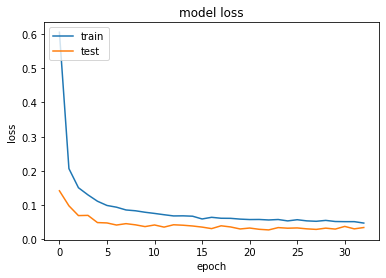

In [218]:
model_loss_plot(history)

In [219]:
def model_accuracy_plot(history):
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()

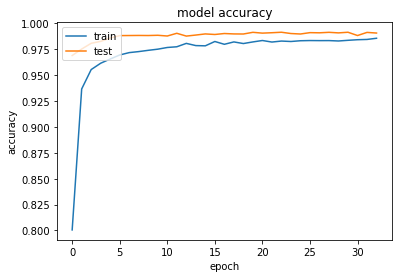

In [220]:
model_accuracy_plot(history)

In [221]:
def model_evaluate(model,X_train,y_train,X_test,y_test):
    train_loss ,train_acc = model.evaluate(X_train, y_train, verbose=0)
    test_loss, test_acc = model.evaluate(X_test, y_test, verbose=0)
    print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))

In [222]:
model_evaluate(model,X_train,Y_train,X_test,Y_test)

Train: 0.995, Test: 0.992


In [223]:
yhat = model.predict_classes(X_test_data)

In [224]:
predict = pd.DataFrame(data=yhat ,columns=["label"])

In [225]:
predict.shape

(21000, 1)

In [226]:
sub = test['filename']
DT = pd.merge(sub , predict, on=None, left_index= True,
    right_index=True)

In [227]:
DT.to_csv('submission.csv',index = False)